# Particle spray algorithm by Chen et al. (2025) via `galpy`

Author: Yingtian "Bill" Chen

We provide a notebook to generate streams using the Chen+25 ([DOI:10.3847/1538-4365/ad9904](https://doi.org/10.3847/1538-4365/ad9904)) model via `galpy`. This implementation has been merged to the main branch of `galpy` since version `v1.10.1`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from galpy.potential import MWPotential2014, PlummerPotential
from galpy.orbit import Orbit
from galpy.df import chen24spraydf, fardal15spraydf

**Define a function to create streams**

In [2]:
def create_stream(df_class, prog_mass, progenitor, pot, t_tot, N, progpot=None):
    spdf = df_class(prog_mass, progenitor=progenitor, pot=pot, tdisrupt=t_tot, leading=True, progpot=progpot)
    spdft = df_class(prog_mass, progenitor=progenitor, pot=pot, tdisrupt=t_tot, leading=False, progpot=progpot)
    
    orbs, dt = spdf.sample(n=N//2, returndt=True, integrate=True)
    orbts, dt = spdft.sample(n=N//2, returndt=True, integrate=True)

    return (
        np.r_[orbs.x(), orbts.x()], 
        np.r_[orbs.y(), orbts.y()], 
        np.r_[orbs.z(), orbts.z()], 
        np.r_[orbs.jr(pot), orbts.jr(pot)], 
        np.r_[orbs.jp(pot), orbts.jp(pot)], 
        np.r_[orbs.jz(pot), orbts.jz(pot)]
    )

In [3]:
pot_host = MWPotential2014

w = Orbit([40*u.kpc, 0*u.km/u.s, 100*u.km/u.s, 0*u.kpc, 0*u.km/u.s, 0*u.deg])

prog_mass = 1e5 * u.Msun
t_tot = 3 * u.Gyr
N = 1000

In [4]:
%time x_f15, y_f15, z_f15, jr_f15, jp_f15, jz_f15 = create_stream(fardal15spraydf, prog_mass, w, pot_host, t_tot, N)
%time x_c25, y_c25, z_c25, jr_c25, jp_c25, jz_c25 = create_stream(chen24spraydf, prog_mass, w, pot_host, t_tot, N)

progpot = PlummerPotential(prog_mass, 4*u.pc)
%time x_c25b, y_c25b, z_c25b, jr_c25b, jp_c25b, jz_c25b = create_stream(chen24spraydf, prog_mass, w, pot_host, t_tot, N, progpot)

/Users/ybchen/Documents/galpy_chen24/galpy/util/__init__.py:174: RuntimeWarning: invalid value encountered in divide
  rotaxis /= numpy.tile(numpy.sqrt(numpy.sum(rotaxis**2.0, axis=1)), (3, 1)).T

CPU times: user 22.4 s, sys: 168 ms, total: 22.6 s
Wall time: 21.3 s
CPU times: user 23.5 s, sys: 173 ms, total: 23.7 s
Wall time: 21 s
CPU times: user 37 s, sys: 845 ms, total: 37.8 s
Wall time: 35.4 s


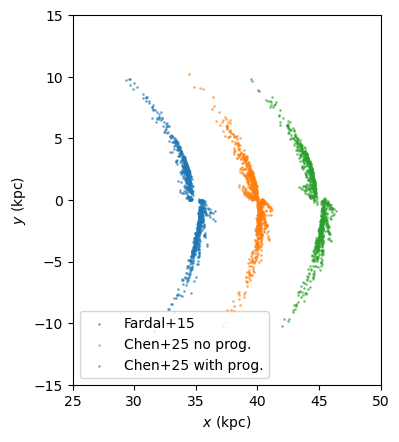

In [5]:
plt.scatter(x_f15-5, y_f15, s=1, alpha=0.5, label='Fardal+15')
plt.scatter(x_c25, y_c25, s=1, alpha=0.5, label='Chen+25 no prog.')
plt.scatter(x_c25b+5, y_c25b, s=1, alpha=0.5, label='Chen+25 with prog.')

plt.xlabel(r'$x\ ({\rm kpc})$')
plt.ylabel(r'$y\ ({\rm kpc})$')
plt.xlim(25, 50)
plt.ylim(-15, 15)
plt.legend(loc='lower left')
plt.gca().set_aspect(1)
plt.show()

## Now, let's calculate actions

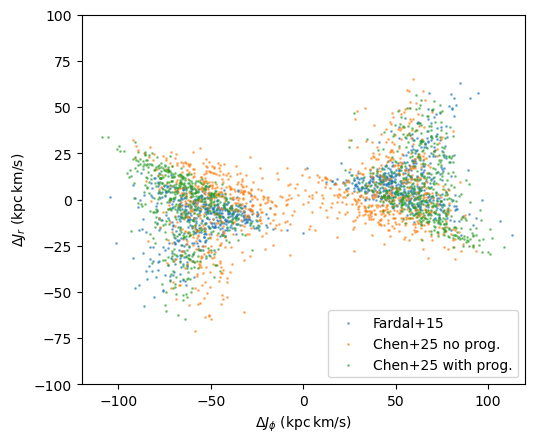

In [6]:
plt.scatter(jp_f15 - w.jp(pot_host), jr_f15 - w.jr(pot_host), s=1, alpha=0.5, label='Fardal+15')
plt.scatter(jp_c25 - w.jp(pot_host), jr_c25 - w.jr(pot_host), s=1, alpha=0.5, label='Chen+25 no prog.')
plt.scatter(jp_c25b - w.jp(pot_host), jr_c25b - w.jr(pot_host), s=1, alpha=0.5, label='Chen+25 with prog.')

plt.xlabel(r'$\Delta J_\phi\ ({\rm kpc\,km/s})$')
plt.ylabel(r'$\Delta J_r\ ({\rm kpc\,km/s})$')
plt.xlim(-120, 120)
plt.ylim(-100, 100)
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.show()